#Bibliotecas e Drives

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/covid19

/content/drive/My Drive/Colab Notebooks/covid19


In [10]:
!ls

 API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 brasil_20200324.csv
 brasil_20200326.csv
 Brasil_20200327.html
 Brasil_covid19-calor.html
 Brasil_covid19.html
 covid19BrazilCelular-script.ipynb
 covid19Brazil-script.ipynb
 covid19-script.ipynb
 covid19-scripts-trash.ipynb
 covid19-SEIR.ipynb
'Documento sem título.gdoc'
 full_data_20200320.csv
 full_data_20200321.csv
 full_data_20200322.csv
 full_data_20200323.csv
 full_data_20200326.csv
 Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 teste.png


#Carregando o banco de dados

In [11]:
url='https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=b8b0c30cbee5f341'
data = requests.get(url).content
world_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
world_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556213,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-27,NaN,NaN,NaN,NaN,-4.0,NaN
1556214,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-28,NaN,NaN,NaN,NaN,0.0,NaN
1556215,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-29,NaN,NaN,NaN,NaN,-18.0,NaN
1556216,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-30,NaN,NaN,NaN,NaN,-12.0,NaN


In [12]:
brazil_df = world_df[world_df['country_region']=='Brazil']
brazil_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
137424,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
137425,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
137426,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
137427,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
137428,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433917,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-07-27,NaN,NaN,NaN,NaN,-18.0,NaN
433918,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-07-28,NaN,NaN,NaN,NaN,-44.0,NaN
433919,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-07-29,NaN,NaN,NaN,NaN,-13.0,NaN
433920,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-07-30,NaN,NaN,NaN,NaN,-12.0,NaN


In [13]:
rs_df = brazil_df[brazil_df['sub_region_1'] == 'State of Rio Grande do Sul']
rs_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
326463,BR,Brazil,State of Rio Grande do Sul,NaN,NaN,BR-RS,NaN,2020-02-15,4.0,1.0,-8.0,3.0,2.0,1.0
326464,BR,Brazil,State of Rio Grande do Sul,NaN,NaN,BR-RS,NaN,2020-02-16,-2.0,1.0,-15.0,-2.0,-3.0,2.0
326465,BR,Brazil,State of Rio Grande do Sul,NaN,NaN,BR-RS,NaN,2020-02-17,-2.0,-1.0,-14.0,2.0,10.0,1.0
326466,BR,Brazil,State of Rio Grande do Sul,NaN,NaN,BR-RS,NaN,2020-02-18,-3.0,0.0,-20.0,4.0,11.0,1.0
326467,BR,Brazil,State of Rio Grande do Sul,NaN,NaN,BR-RS,NaN,2020-02-19,1.0,2.0,1.0,4.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350012,BR,Brazil,State of Rio Grande do Sul,Xangri-lá,NaN,NaN,NaN,2020-07-27,-61.0,-47.0,NaN,NaN,-27.0,NaN
350013,BR,Brazil,State of Rio Grande do Sul,Xangri-lá,NaN,NaN,NaN,2020-07-28,-66.0,-49.0,NaN,NaN,-33.0,NaN
350014,BR,Brazil,State of Rio Grande do Sul,Xangri-lá,NaN,NaN,NaN,2020-07-29,-57.0,-38.0,NaN,NaN,-25.0,NaN
350015,BR,Brazil,State of Rio Grande do Sul,Xangri-lá,NaN,NaN,NaN,2020-07-30,-58.0,-39.0,NaN,NaN,-27.0,NaN


In [20]:
def my_bar_plots(df, coluna, cor, tipo):
  ax.bar(df.date, df[coluna], width=0.8, color=cor, label=tipo)
  ax.axis(['2020-02-15', '2020-08-02', -100, 75])
  ax.grid(ls='-.', lw=0.45)
  ax.legend(fontsize=8, loc=1)
  ax.xaxis.set_major_locator(plt.MaxNLocator(3))
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

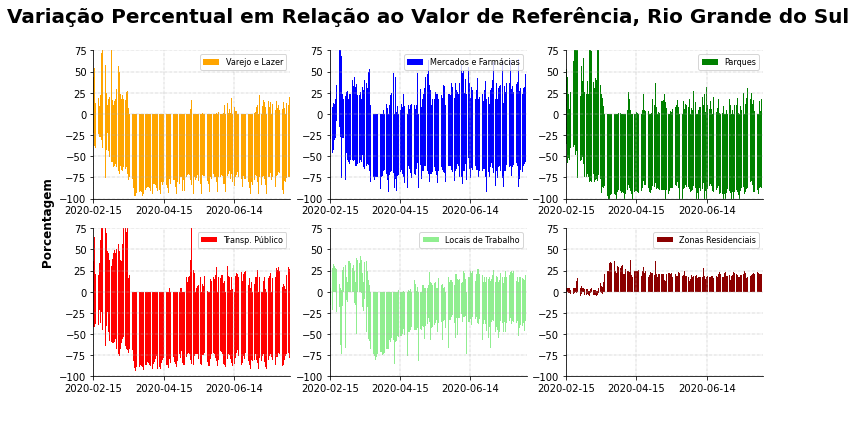

In [22]:
fig = plt.figure(figsize=(12,6),)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

#Varejo e Lazer
ax = fig.add_subplot(231)
my_bar_plots(rs_df, 'retail_and_recreation_percent_change_from_baseline', 
             'orange', 'Varejo e Lazer')

#Mercados e Farmácias
ax = fig.add_subplot(232)
my_bar_plots(rs_df, 'grocery_and_pharmacy_percent_change_from_baseline', 'blue',
             'Mercados e Farmácias')
ax.set_title('Variação Percentual em Relação ao Valor de Referência, Rio Grande do Sul\n',
             fontsize=20, weight='bold')

#Parques
ax = fig.add_subplot(233)
my_bar_plots(rs_df, 'parks_percent_change_from_baseline', 'green', 'Parques')

#Transp. Público
ax = fig.add_subplot(234)
my_bar_plots(rs_df, 'transit_stations_percent_change_from_baseline', 'red', 
             'Transp. Público')
ax.set_ylabel('\n                                       Porcentagem', 
              weight='bold', fontsize=12)

#Locais de Trabalho
ax = fig.add_subplot(235)
my_bar_plots(rs_df, 'workplaces_percent_change_from_baseline', 'lightgreen', 
             'Locais de Trabalho')

#Zonas Residenciais
ax = fig.add_subplot(236)
my_bar_plots(rs_df, 'residential_percent_change_from_baseline', 'darkred', 
             'Zonas Residenciais')

#plt.show()
fig.savefig("mobilidade-2020.07.31.png", bbox_inches='tight', dpi=600)